In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


# knowing the data

In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
df.shape

(1117957, 22)

In [6]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


# feature selection

In [7]:
df.corr

<bound method DataFrame.corr of               id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0              0                 5                   8                5   
1              1                 6                   7                4   
2              2                 6                   5                6   
3              3                 3                   4                6   
4              4                 5                   3                2   
...          ...               ...                 ...              ...   
1117952  1117952                 3                   3                4   
1117953  1117953                 2                   2                4   
1117954  1117954                 7                   3                9   
1117955  1117955                 7                   3                3   
1117956  1117956                 4                   5                6   

         Deforestation  Urbanization  ClimateChange  DamsQuality  S

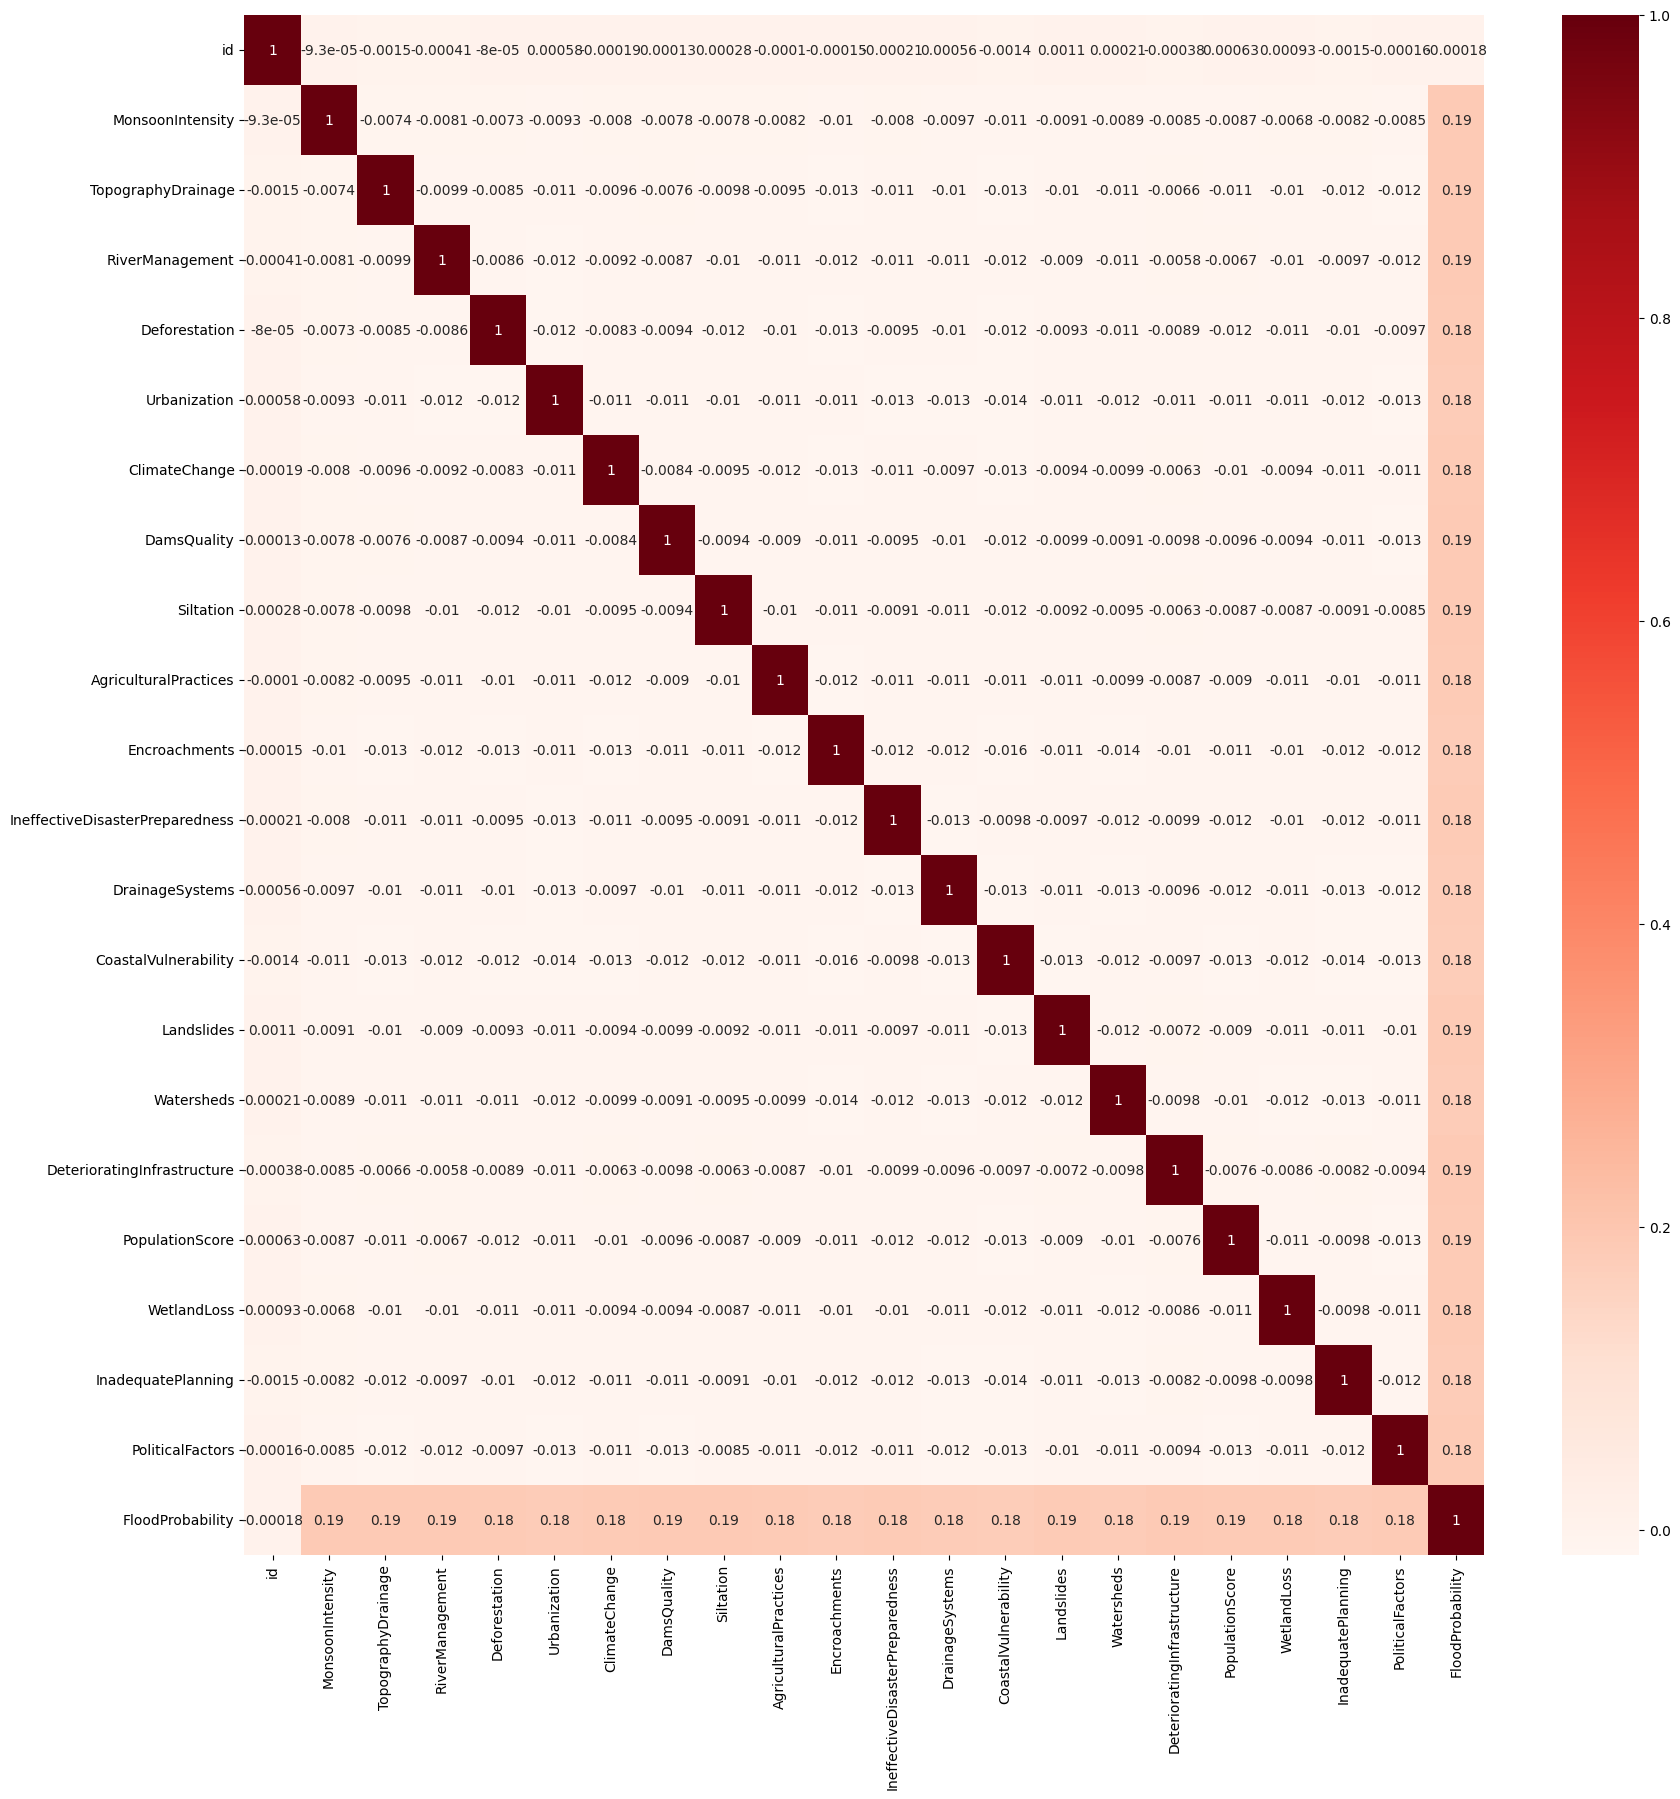

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="Reds",annot=True)
plt.show()

from the heatmap, none of the colums is correlated,hence the only column that will be drop is the ID column as it will have no contribution to the machine learning algorithm

In [9]:
df.drop(columns=["id"],inplace=True)

Data Visualisaion by creating boxplot

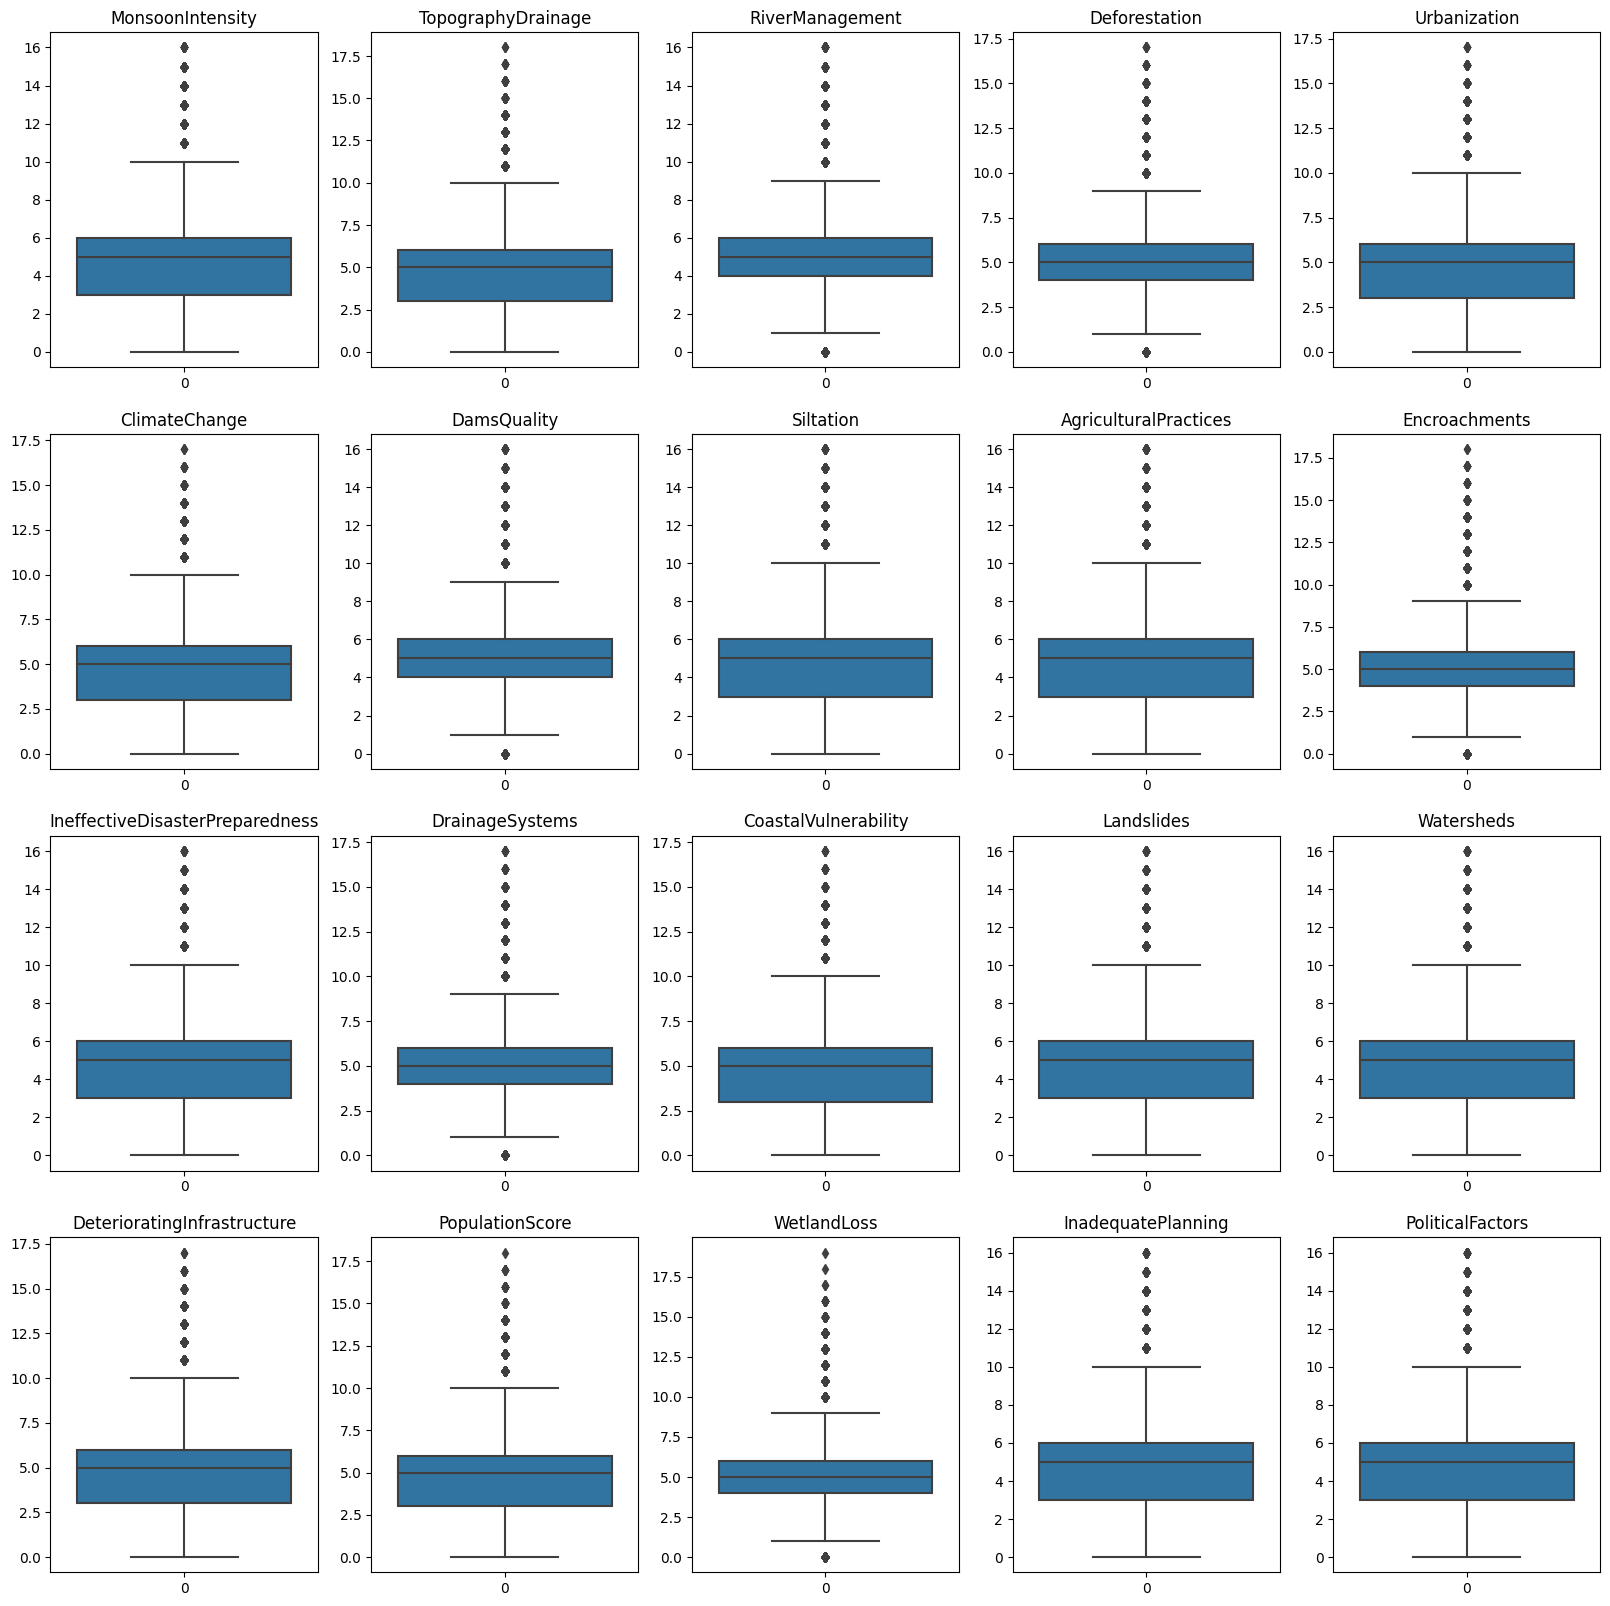

In [10]:
fig=plt.figure(figsize=(20,20))
for (i,column) in zip(np.arange(1,21,1),df.columns[:-1]):
    sns.boxplot(data=df[column], ax=fig.add_subplot(4,5,i,title=column))

In [11]:
# def outlier_detection(df, column):
#     outlier=[]
#     for x in df[column]:
#         z=np.divide( x-np.mean(df[column]), np.std(df[column]))
#         if z > 3:
#             outlier.append(x)
#             df[column]=df[column].replace(x, np.mean(df[column])).copy()
#     return column,outlier        
    
            

In [12]:
# for column in df.columns[:-1]:
#     outlier_detection(df,column) 

spliting the data into dependend(y) and indepedent variable(X)

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

X=df.iloc[:,:-1]
scalar=MinMaxScaler()
X_scaled= scalar.fit_transform(X)

X=pd.DataFrame(data=X_scaled, columns=X.columns,index=X.index)
y=df.iloc[:,-1:]
y

,FloodProbability
0,0.445
1,0.450
2,0.530
3,0.535
4,0.415
...,...
1117952,0.495
1117953,0.480
1117954,0.485
1117955,0.495


Choosen a model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
# param_g= {'alpha':[0.001,0.01,0.1,2.0,4.0,16.0,100]}
# Gridsearch=GridSearchCV(estimator=Ridge(),param_grid=param_g,scoring="r2")
# Gridsearch.fit(X,y)
# Gridsearch.best_params_

the randomizedsearchcv and gridsearchcv is very slow. taking almost eternity for it to run. The reason is that, we are
dealing with a large dataset to the tune of 11 million records. is we set max_split=3. it run succesfully but when it is to a reasonable value say 70 percent of the data(max_split=0.7) it can't run. 

in conclusion the lasso and ridge regression that was use before the randomforest model  seems to perform better, since it has 84% percent accuracy. even though the accuracy remains the same with different alpha values (panelization) 

In [20]:
param_d= {"max_depth":[2,3,4],"n_estimators":[100,200,300,],
          "min_samples_split":[2,3,4 ],"max_features":["sqrt",None],
         "criterion":["squared_error","absolute_error"]}
Rdfr=RandomForestRegressor(max_samples=0.7,oob_score=True,random_state=2, n_jobs=-1) 
Randomsearch=RandomizedSearchCV(estimator=Rdfr,param_distributions=param_d, n_iter=5, scoring="neg_mean_squared_error",random_state=1, cv=4,n_jobs=-1)
Randomsearch.fit(X,np.ravel(y,order="F"))
Randomsearch.cv_results_

df_result= pd.DataFrame(Randomsearch.cv_results_)
df_result
# Randomsearch.best_par
# Randomsearch.best_score_

KeyboardInterrupt: 

In [17]:
# param_g= {"max_depth":[2,3],"n_estimators":[100,400],
#           "min_samples_split":[2,4 ],"max_features":["sqrt","None"],
#          "criterion":["squared_error","absolute_error"]}
# Rdfr=RandomForestRegressor(max_samples=0.7,oob_score=True) 
# Gridsearch=GridSearchCV(Rdfr,param_grid=param_g,scoring="r2", cv=3,n_jobs=-1)
# Gridsearch.fit(X,np.ravel(y, order="F"))
# Gridsearch.best_params_
# Gridsearch.best_score_

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
# model=Ridge(alpha=16)
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)
# score=r2_score(y_test,y_pred)
# score